In [1]:
from scipy.io import loadmat
import pickle

In [2]:
with open('grobner_times_all.dict', 'rb') as f:
    example = pickle.load(f)
print(example)

{2: {4: {1: [(['1', '0', '2'], True, 0.008565573770491802), (['1', '0', '2'], True, 0.007042253521126761), (['1', '0', '2'], True, 0.006329113924050633), (['1', '0', '2'], True, 0.006024096385542169), (['1', '0', '2'], True, 0.006060606060606061), (['0', '3', '2'], True, 0.005917159763313609), (['0', '3', '2'], True, 0.006349206349206349), (['0', '3', '2'], True, 0.005934718100890208), (['0', '3', '2'], True, 0.005970149253731343), (['0', '3', '2'], True, 0.0058823529411764705), (['1', '3', '2'], True, 0.0058823529411764705), (['1', '3', '2'], True, 0.005934718100890208), (['1', '3', '2'], True, 0.006024096385542169), (['1', '3', '2'], True, 0.00641744548286604), (['1', '3', '2'], True, 0.006097560975609756), (['1', '3', '2'], True, 0.005970149253731343), (['1', '3', '2'], True, 0.0058997050147492625), (['1', '3', '2'], True, 0.0058997050147492625), (['1', '3', '2'], True, 0.0058997050147492625), (['1', '3', '2'], True, 0.005917159763313609), (['0', '3', '2'], True, 0.00664451827242524

In [2]:
mat = loadmat('matlab_runtime.mat')

In [16]:
data = mat['tests'][0]

In [17]:
print(data[0])

[[array([[7]], dtype=uint8) array([[3]], dtype=uint8)
  array(['0212211,1000002,1202212,1201122,1112220,1021002,0010011,1000211'],
      dtype='<U63')
  array([[1]], dtype=uint8)
  array([[0.14238113, 0.13431597, 0.13511044, 0.13299778, 0.14787225]])]]


In [33]:
d = data[0][0]
R = d[4][0]
print(R)

[0.14238113 0.13431597 0.13511044 0.13299778 0.14787225]


In [12]:
print(mat['tests'][0])

[array([[array([[7]], dtype=uint8), array([[3]], dtype=uint8),
        array(['0212211,1000002,1202212,1201122,1112220,1021002,0010011,1000211'],
      dtype='<U63'),
        array([[1]], dtype=uint8),
        array([[0.14238113, 0.13431597, 0.13511044, 0.13299778, 0.14787225]])]],
      dtype=object)
 array([[array([[7]], dtype=uint8), array([[3]], dtype=uint8),
        array(['1120220,0112201,0220220,2211012,0110001,2100011,1022101,0220112'],
      dtype='<U63'),
        array([[1]], dtype=uint8),
        array([[0.13515893, 0.13533722, 0.13909303, 0.14014138, 0.13698428]])]],
      dtype=object)
 array([[array([[7]], dtype=uint8), array([[3]], dtype=uint8),
        array(['1100121,0110022,0100201,0212120,2022101,2120221,0220020,2110211'],
      dtype='<U63'),
        array([[1]], dtype=uint8),
        array([[0.13681744, 0.13629642, 0.13962458, 0.13600128, 0.13719419]])]],
      dtype=object)
 ...
 array([[array([[10]], dtype=uint8), array([[2]], dtype=uint8),
        array(['100111

In [12]:
def parseData(filename):
    mat = loadmat(filename)
    data = mat['tests'][0]
    ILP_times = {}
    for d in data:
        d = d[0]
        As = list(ILP_times.keys())
        k = d[0][0][0]
        a = d[1][0][0]
        R = d[2][0]
        R = R.split(',')
        isResolving = d[3][0][0]
        times = d[4][0]
        if a not in As:
            ILP_times[a] = {}     
        ks = list(ILP_times[a].keys())
        if k not in ks:
            ILP_times[a][k] = []
        for time in times:
            ILP_times[a][k].append((R,isResolving,time))
    return ILP_times

In [21]:
filename = 'matlab_runtime.mat'
ILP_times = parseData(filename)


In [22]:
ILP_times = {5: ILP_times}

In [23]:
print(ILP_times)

{5: {3: {7: [(['0212211', '1000002', '1202212', '1201122', '1112220', '1021002', '0010011', '1000211'], 1, 0.1423811322186665), (['0212211', '1000002', '1202212', '1201122', '1112220', '1021002', '0010011', '1000211'], 1, 0.1343159700450601), (['0212211', '1000002', '1202212', '1201122', '1112220', '1021002', '0010011', '1000211'], 1, 0.13511043971697845), (['0212211', '1000002', '1202212', '1201122', '1112220', '1021002', '0010011', '1000211'], 1, 0.13299777681003863), (['0212211', '1000002', '1202212', '1201122', '1112220', '1021002', '0010011', '1000211'], 1, 0.14787224879489372), (['1120220', '0112201', '0220220', '2211012', '0110001', '2100011', '1022101', '0220112'], 1, 0.13515892706238364), (['1120220', '0112201', '0220220', '2211012', '0110001', '2100011', '1022101', '0220112'], 1, 0.13533721593492937), (['1120220', '0112201', '0220220', '2211012', '0110001', '2100011', '1022101', '0220112'], 1, 0.13909302764019618), (['1120220', '0112201', '0220220', '2211012', '0110001', '210

In [26]:
with open('ILP_times_all.dict','wb') as f:
    pickle.dump(ILP_times,f)

In [7]:
0 == False

True

In [27]:
%run grobnerTests.py --data 2 --plot

READ TSV FILES
START RUNS


C:\Users\llair\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\llair\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\llair\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\llair\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\llair\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


DONE


<Figure size 432x288 with 0 Axes>

In [19]:
with open('ILP_times_modified.dict','rb') as f:
    test = pickle.load(f)

In [20]:
print(test)

{5: {3: {7: [(['0212211', '1000002', '1202212', '1201122', '1112220', '1021002', '0010011', '1000211'], 1, 0.1423811322186665), (['0212211', '1000002', '1202212', '1201122', '1112220', '1021002', '0010011', '1000211'], 1, 0.1343159700450601), (['0212211', '1000002', '1202212', '1201122', '1112220', '1021002', '0010011', '1000211'], 1, 0.13511043971697845), (['0212211', '1000002', '1202212', '1201122', '1112220', '1021002', '0010011', '1000211'], 1, 0.13299777681003863), (['0212211', '1000002', '1202212', '1201122', '1112220', '1021002', '0010011', '1000211'], 1, 0.14787224879489372), (['1120220', '0112201', '0220220', '2211012', '0110001', '2100011', '1022101', '0220112'], 1, 0.13515892706238364), (['1120220', '0112201', '0220220', '2211012', '0110001', '2100011', '1022101', '0220112'], 1, 0.13533721593492937), (['1120220', '0112201', '0220220', '2211012', '0110001', '2100011', '1022101', '0220112'], 1, 0.13909302764019618), (['1120220', '0112201', '0220220', '2211012', '0110001', '210

In [54]:
ilp = ILP_times[5]

In [55]:
import numpy as np
import matplotlib.pyplot as plt
maxSize = 25
resType = 2
maxY = 0

dict_keys([2187, 3, 9, 243, 27, 729, 6561, 81, 64, 8, 256, 16, 2048, 128, 2, 4096, 4, 512, 32, 1024, 25, 3125, 625, 5, 125])


<ErrorbarContainer object of 3 artists>

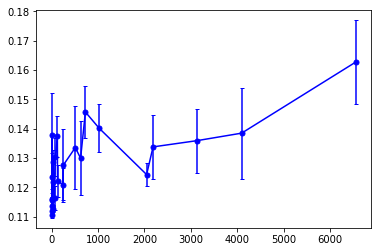

In [70]:
sizes = {}
for a in ilp:
    for k in ilp[a]:
        a = int(a)
        k = int(k)
        s = a**k
        if a*k>maxSize: 
            break
        if s not in sizes: 
            sizes[s] = []
        for (R, res, t) in ilp[a][k]:
            if resType==0 and res==True: sizes[s].append(t)
            elif resType==1 and res==False: sizes[s].append(t)
            elif resType==2: sizes[s].append(t)
print(sizes.keys())
X = sorted(sizes.keys())
Y = [np.mean(sizes[s]) for s in X]
E = [np.std(sizes[s]) for s in X]
(X,Y,E) = zip(*[(x,y,e) for (x,y,e) in zip(X,Y,E) if not np.isnan(y)])
maxY = maxY if maxY > max(Y) else max(Y) #maxY if maxY > sum(max(zip(Y,E), key=lambda x: x[0])) else sum(max(zip(Y,E), key=lambda x: x[0]))
plt.errorbar(X, Y, yerr=E, label='ilp', capsize=2, fmt='bo', markersize=5)

In [64]:
print(3**7)

2187


In [38]:
for k in ilp[2]:
    print(k)

6
3
8
4
11
7
1
12
2
9
5
10


In [39]:
print(np.power(2,12))

4096


In [40]:
int(np.power(2,12))

4096

In [41]:
2**12

4096

In [42]:
X = sorted(sizes.keys())
print(X)

[0, 2, 3, 4, 5, 8, 9, 16, 25, 27, 32, 53, 64, 81, 113, 125, 128, 139, 161, 217, 243]


In [43]:
print(sizes.keys())

dict_keys([139, 3, 9, 243, 27, 217, 161, 81, 64, 8, 0, 16, 128, 2, 4, 32, 25, 53, 113, 5, 125])


In [44]:
a = 3
print(ilp[a].keys())

dict_keys([7, 1, 2, 5, 3, 6, 8, 4])


In [50]:
s = int(np.power(a,7))
print(s)

2187


In [51]:
print(3*7)

21


In [52]:
sizes = {}
if s not in sizes: sizes[s] = []

In [53]:
print(sizes.keys())

dict_keys([2187])
